In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

LPF 帮助我们去除噪音，模糊图像。 
HPF 帮助我们找到图像的边缘

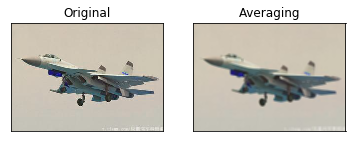

In [3]:
# 平均数
img = cv2.imread('1.jpg')
kernel = np.ones((5,5),np.float32)/25
# 
dst = cv2.filter2D(img,-1,kernel)
#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F
#when ddepth=-1, the output image will have the same depth as the source.

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

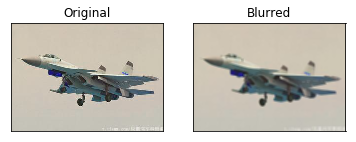

In [6]:
#归一化卷积框
img = cv2.imread('1.jpg')
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

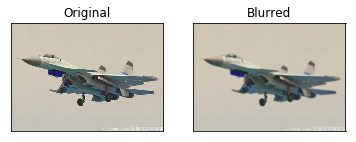

In [7]:
# 高斯 函数标准差
img = cv2.imread('1.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

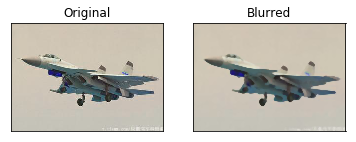

In [8]:
# 中值模糊
img = cv2.imread('1.jpg')
blur = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

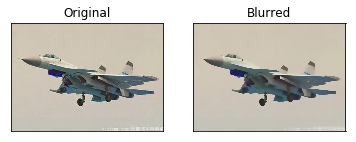

In [9]:
# 双边滤波
img = cv2.imread('1.jpg')
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
#d – Diameter of each pixel neighborhood that is used during filtering.
# If it is non-positive, it is computed from sigmaSpace
#9 邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差
blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

腐蚀
erosion = cv2.erode(img,kernel,iterations = 1)

膨胀
dilation = cv2.dilate(img,kernel,iterations = 1)

开运算 ，先进性腐蚀再进行膨胀就叫做开运算 

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

闭运算 先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的
小黑点。
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


形态学梯度
是一幅图像膨胀与腐蚀的差别
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

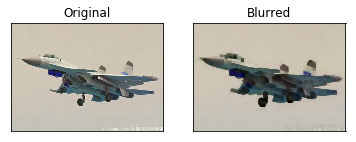

In [16]:
img = cv2.imread('1.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap=plt.cm.gray),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

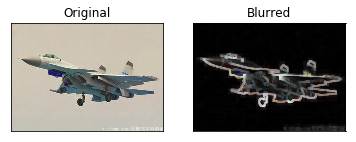

In [17]:
img = cv2.imread('1.jpg')
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap=plt.cm.gray),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 图像梯度 

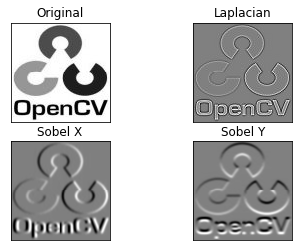

In [19]:
img=cv2.imread('rio.jpg',0)
#cv2.CV_64F 输出图像的深度（数据类型），可以使用-1, 与原图像保持一致 np.uint8
laplacian=cv2.Laplacian(img,cv2.CV_64F)
# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

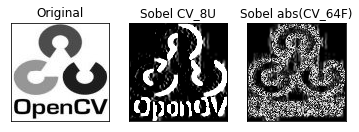

In [20]:
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# 也可以将参数设为-1
#sobelx8u = cv2.Sobel(img,-1,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()